# ResNet50 with Data Augmentation

In [58]:
from keras.applications.resnet50 import ResNet50

from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import os , shutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd #for importing and managing datasets
from keras.utils import np_utils

from keras import backend as K
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten  #Use to convert Pooled image into input later for fully connected layer
from keras.optimizers import Adam
from keras.metrics import binary_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import confusion_matrix
#%matplotlib.inline


import itertools



from sklearn.metrics import confusion_matrix

import tensorflow as tf

In [2]:
train_path = '/home/usojourn/Desktop/stanford_cs230/Project/parcels/training_set'
valid_path = '/home/usojourn/Desktop/stanford_cs230/Project/parcels/validation_set'
test_path = '/home/usojourn/Desktop/stanford_cs230/Project/parcels/test_set'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(197,197),classes = ['damaged','undamaged'],batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size=(197,197),classes = ['damaged','undamaged'],batch_size=200)
test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size=(197,197),classes = ['damaged','undamaged'],batch_size=200)

Found 1929 images belonging to 2 classes.
Found 199 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [4]:

conv_base = ResNet50(weights='imagenet',include_top=False,input_shape=(197,197,3))

In [5]:
conv_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 197, 197, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 99, 99, 64)   9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 99, 99, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 99, 99, 64)   0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [6]:
from keras import models
from keras import layers

In [7]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               524544    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 24,112,513
Trainable params: 24,059,393
Non-trainable params: 53,120
_________________________________________________________________


In [9]:
#Freeze the convolutional base first.
print('This is the number of trainable weights before freezing the conv base:' ,len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights after freezing the conv base:' ,len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 216
This is the number of trainable weights after freezing the conv base: 4


In [10]:
#Now we prepare to run the images througn the neural network
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

#Training image augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        rotation_range = 50,
        width_shift_range = .2,
        height_shift_range= .2,
        horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

#Making sure we have the right dimension size
training_generator = train_datagen.flow_from_directory(
        '/home/usojourn/Desktop/stanford_cs230/Project/parcels/training_set',
        target_size=(197,197),
        batch_size=10,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        '/home/usojourn/Desktop/stanford_cs230/Project/parcels/test_set',
        target_size=(197,197),
        batch_size=10,
        class_mode='binary')



validation_generator = valid_datagen.flow_from_directory(
        '/home/usojourn/Desktop/stanford_cs230/Project/parcels/validation_set',
        target_size=(197,197),
        batch_size=10,
        class_mode='binary')

Found 1929 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


In [11]:
# Compile the model
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer= optimizers.RMSprop(lr=.0001),metrics=['acc'])

In [12]:
# Fit the generator to the model
history = model.fit_generator(
        training_generator,
        steps_per_epoch=193,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=200, verbose=1)

Epoch 1/30
107/193 [===============>..............] - ETA: 16s - loss: 0.5855 - acc: 0.7000

/home/usojourn/anaconda3/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


193/193 [==============================] - 56s 293ms/step - loss: 0.5410 - acc: 0.7316 - val_loss: 0.9488 - val_acc: 0.4975
Epoch 2/30
193/193 [==============================] - 52s 269ms/step - loss: 0.4410 - acc: 0.8056 - val_loss: 1.1141 - val_acc: 0.4975
Epoch 3/30
193/193 [==============================] - 52s 269ms/step - loss: 0.4189 - acc: 0.8090 - val_loss: 1.0585 - val_acc: 0.4975
Epoch 4/30
193/193 [==============================] - 52s 269ms/step - loss: 0.3814 - acc: 0.8334 - val_loss: 1.4839 - val_acc: 0.4975
Epoch 5/30
193/193 [==============================] - 53s 274ms/step - loss: 0.3806 - acc: 0.8321 - val_loss: 1.4215 - val_acc: 0.4975
Epoch 6/30
193/193 [==============================] - 54s 281ms/step - loss: 0.3589 - acc: 0.8420 - val_loss: 1.5476 - val_acc: 0.4975
Epoch 7/30
193/193 [==============================] - 55s 283ms/step - loss: 0.3472 - acc: 0.8455 - val_loss: 1.4731 - val_acc: 0.4975
Epoch 8/30
193/193 [==============================] - 54s 279ms/st

In [69]:
model.save('resnet_aug_lr0001.h5')

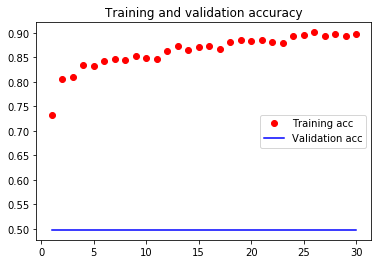

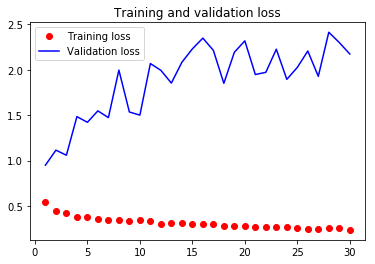

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo',color='red', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')

plt.legend()

plt.figure()


plt.plot(epochs, loss, 'bo',color='red', label='Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
test_images, test_labels = next(test_batches)


In [20]:
test_labels = test_labels[:,0]
test_labels

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.], dtype=float32)

In [36]:
predict = model.predict_generator(test_batches,steps=1,verbose=0)

In [37]:
predict

array([[0.99555016],
       [0.9965237 ],
       [0.9999858 ],
       [0.99974376],
       [0.999905  ],
       [0.9998977 ],
       [0.98697776],
       [0.99979335],
       [0.9998914 ],
       [0.51592994],
       [0.99998736],
       [0.9041262 ],
       [0.94871163],
       [0.31387413],
       [0.9999821 ],
       [0.98484117],
       [0.9962464 ],
       [0.9982681 ],
       [0.9941281 ],
       [0.9648567 ],
       [0.9994691 ],
       [0.04351606],
       [0.05198969],
       [0.9967141 ],
       [0.9394027 ],
       [0.51592994],
       [0.9999958 ],
       [0.9871617 ],
       [0.9800994 ],
       [0.9088482 ],
       [0.99532   ],
       [0.98098236],
       [0.99897766],
       [0.99317366],
       [0.880423  ],
       [0.52886826],
       [0.46872535],
       [0.9999757 ],
       [0.99998784],
       [0.9998728 ],
       [0.999496  ],
       [0.9998301 ],
       [0.9993119 ],
       [0.87286943],
       [0.8436519 ],
       [0.99985826],
       [0.99965084],
       [0.715

In [64]:

n = 0

for i in predict:
    if (predict[n] > 0.5):
        predict[n] = 1
    else:
        predict[n] = 0
    n += 1


In [65]:
predict

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [66]:
cm = confusion_matrix(test_labels,predict)

In [67]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    #This function prints and plots the confusion matrix.
    #Normalization can be applied by setting `normalize=True`.
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 8 92]
 [ 9 91]]


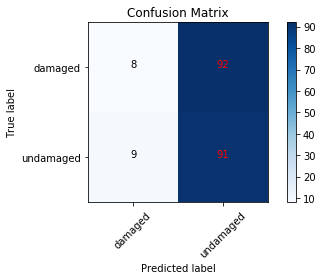

In [68]:
cm_plot_labels = ['damaged', 'undamaged']
plot_confusion_matrix(cm,cm_plot_labels, title='Confusion Matrix')

In [70]:
K.clear_session()